In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d sanskar457/fraud-transaction-detection

Dataset URL: https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection
License(s): DbCL-1.0
 97% 33.0M/34.0M [00:00<00:00, 82.1MB/s]
100% 34.0M/34.0M [00:00<00:00, 78.2MB/s]


In [ ]:
from zipfile import ZipFile
dataset='/content/fraud-transaction-detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score, confusion_matrix,
                             classification_report, precision_score, recall_score, roc_curve)

In [ ]:
df=pd.read_csv("/content/Final Transactions.csv")

In [ ]:
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [ ]:
df.shape

(1754155, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [ ]:
df.describe()

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,8.770770e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01,1.345200e-01,1.449746e-01
std,5.063811e+05,5.063811e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01,3.412103e-01,3.874872e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,4.385385e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,8.770770e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,1.315616e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,1.754154e+06,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
TRANSACTION_ID,0
TX_DATETIME,0
CUSTOMER_ID,0
TERMINAL_ID,0
TX_AMOUNT,0
TX_TIME_SECONDS,0
TX_TIME_DAYS,0
TX_FRAUD,0
TX_FRAUD_SCENARIO,0


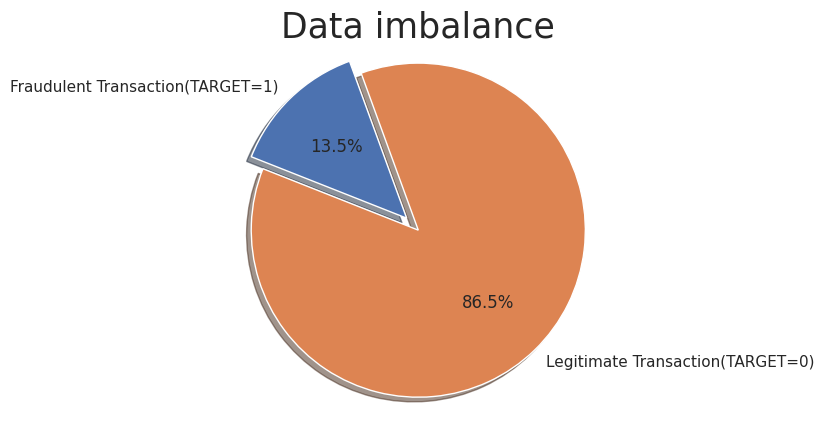

In [ ]:
count1 = 0
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')
plt.title('Data imbalance',fontsize=25)
plt.show()

In [ ]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df.set_index('TX_DATETIME', inplace=True)
transactions_over_time = df.resample('D').size().reset_index(name='Transactions')
fig = px.line(transactions_over_time, x='TX_DATETIME', y='Transactions',
              title='Number of Transactions Over Time',
              labels={'TX_DATETIME': 'Date', 'Transactions': 'Number of Transactions'})
fig.show()

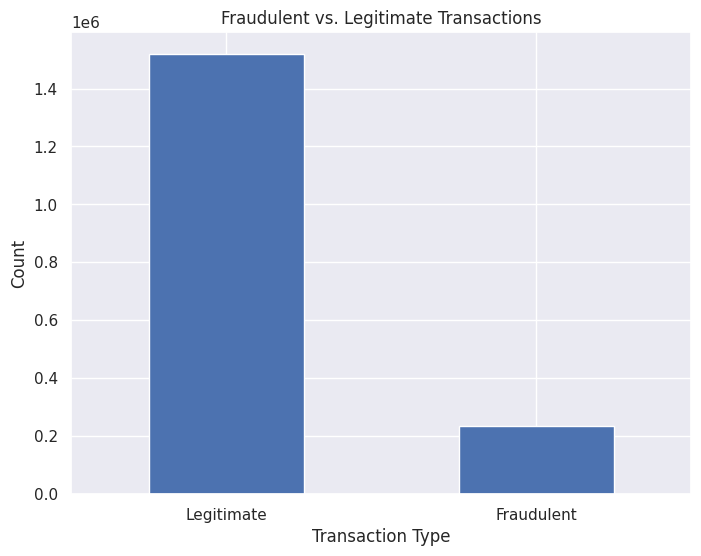

In [ ]:
# Bar Chart of Fraudulent vs. Legitimate Transactions
fraud_counts = df['TX_FRAUD'].value_counts()
fraud_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Fraudulent vs. Legitimate Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'], rotation=0)
plt.show()

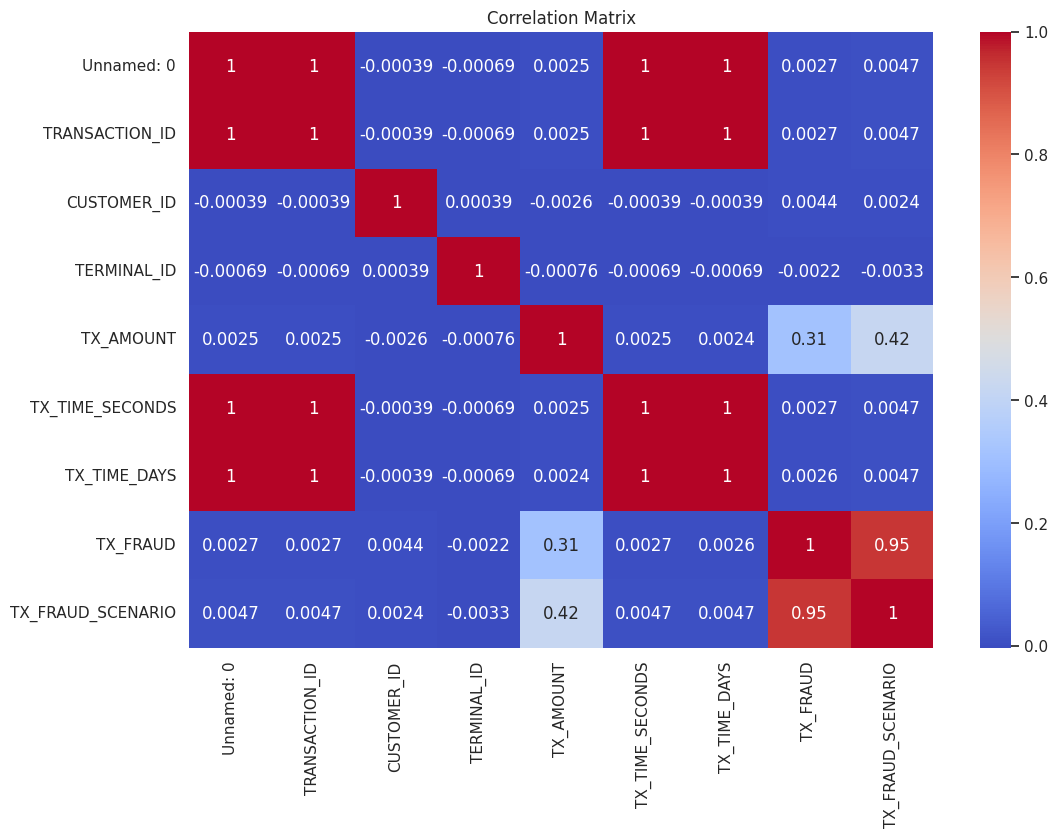

In [ ]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fraud_counts = df['TX_FRAUD'].value_counts().reset_index()
fraud_counts.columns = ['TX_FRAUD', 'count']
fraud_counts['TX_FRAUD'] = fraud_counts['TX_FRAUD'].map({0: 'Legitimate', 1: 'Fraudulent'})

fig = px.bar(fraud_counts, x='TX_FRAUD', y='count', title='Fraudulent vs. Legitimate Transactions')
fig.show()


In [ ]:
customer_activity = df['CUSTOMER_ID'].value_counts().nlargest(8).reset_index()
customer_activity.columns = ['CUSTOMER_ID', 'count']

fig = px.bar(customer_activity, x='CUSTOMER_ID', y='count', color='count', color_continuous_scale='Viridis', title='Top 8 Customers by Transaction Count')
fig.show()


In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=go.Heatmap(
#     z=df['TX_AMOUNT'],
#     x=df['TX_DATETIME'],
#     y=df['TX_FRAUD'],
#     colorscale='Viridis'))
# fig.update_layout(title='Heatmap of Fraud by Time and Amount')
# fig.show()


In [ ]:
df = df.drop(df.index[0])
fraud = df[df['TX_FRAUD'] == 1]
non_fraud = df[df['TX_FRAUD'] == 0]
n_non_fraud = len(non_fraud)
fraud_upsampled = fraud.sample(n_non_fraud, replace=True)
df_upsampled = pd.concat([fraud_upsampled, non_fraud])
df = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df.to_csv('cleaned_transactions.csv', index=False)

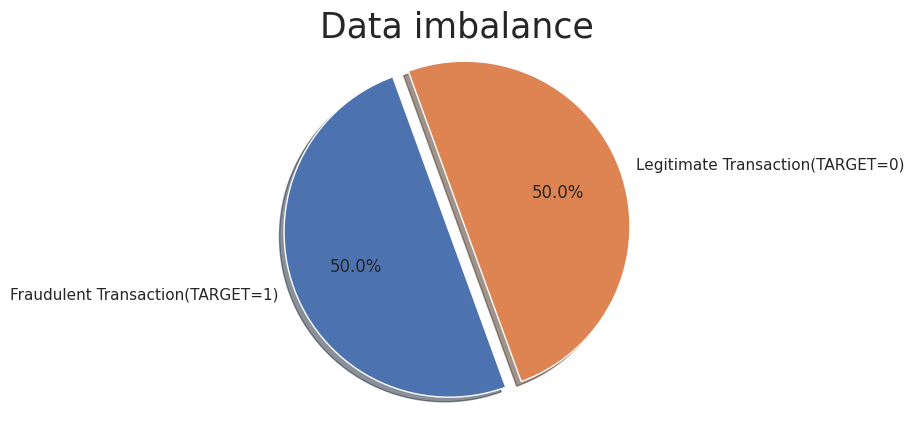

In [ ]:
df = df_upsampled
count1 = 0
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')
plt.title('Data imbalance',fontsize=25)
plt.show()

In [ ]:
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
df.head(5)

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
TX_DATETIME,,,,,,,,
2023-05-10 10:35:13,1240591,3846,7909,1356.95,11183713,129,1,1
2023-06-05 10:16:43,1489040,1687,949,1286.95,13429003,155,1,1
2023-05-29 09:00:58,1421555,2194,4552,1112.68,12819658,148,1,1
2023-03-09 08:13:20,644886,3487,1249,1306.97,5818400,67,1,1
2023-05-17 05:44:25,1304923,3146,122,1019.51,11771065,136,1,1


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix['TX_FRAUD'].sort_values(ascending=False))

TX_FRAUD             1.000000
TX_FRAUD_SCENARIO    0.916403
TX_AMOUNT            0.245194
CUSTOMER_ID          0.006824
TRANSACTION_ID       0.003818
TX_TIME_SECONDS      0.003817
TX_TIME_DAYS         0.003815
TERMINAL_ID         -0.002807
Name: TX_FRAUD, dtype: float64


In [ ]:
customer_counts = df['CUSTOMER_ID'].value_counts()
print(customer_counts)


CUSTOMER_ID
4396    2708
3217    2705
3880    2662
815     2621
4831    2592
        ... 
2502       1
3801       1
822        1
3253       1
4534       1
Name: count, Length: 4990, dtype: int64


In [ ]:
# feature_names = [ 'TRANSACTION_ID', 'CUSTOMER_ID', 'TERMINAL_ID',
#                  'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
#                  'TX_FRAUD', 'TX_FRAUD_SCENARIO']
# feature_names = [ 'CUSTOMER_ID','TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']

Fraud Detection: Decision Tree

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns=["TX_FRAUD","TRANSACTION_ID", "TERMINAL_ID", "TX_FRAUD_SCENARIO"])
y = df["TX_FRAUD"]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=0)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
import joblib
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    303543
           1       0.99      1.00      1.00    303731

    accuracy                           1.00    607274
   macro avg       1.00      1.00      1.00    607274
weighted avg       1.00      1.00      1.00    607274



In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.9963327921169027

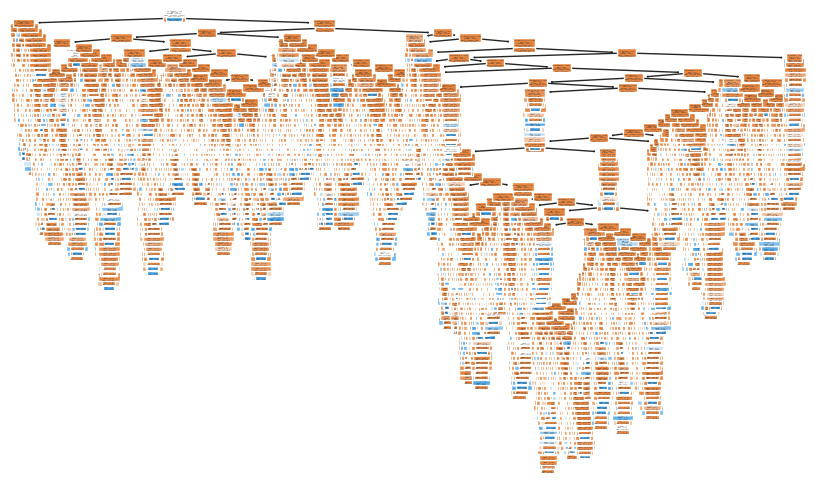

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
feature_names = ['CUSTOMER_ID','TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']

plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=feature_names, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()

Fraud Detection: KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=["TX_FRAUD", "TRANSACTION_ID", "TERMINAL_ID", "TX_FRAUD_SCENARIO"])
y = df["TX_FRAUD"]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy", acc)


Accuracy 0.984091201006465


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    303543
           1       0.97      1.00      0.98    303731

    accuracy                           0.98    607274
   macro avg       0.98      0.98      0.98    607274
weighted avg       0.98      0.98      0.98    607274



Fraud Detection: Logistic Regression


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop(columns=["TX_FRAUD", "TRANSACTION_ID", "TERMINAL_ID", "TX_FRAUD_SCENARIO"])
y = df["TX_FRAUD"]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=0)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy", acc)

Accuracy 0.9523740519106696


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95    303543
           1       0.94      0.97      0.95    303731

    accuracy                           0.95    607274
   macro avg       0.95      0.95      0.95    607274
weighted avg       0.95      0.95      0.95    607274



Fraud Detection: Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=["TX_FRAUD", "TRANSACTION_ID", "TERMINAL_ID", "TX_FRAUD_SCENARIO"])
y = df["TX_FRAUD"]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=0)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy", acc)


Accuracy 0.9998122758425356


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    303543
           1       1.00      1.00      1.00    303731

    accuracy                           1.00    607274
   macro avg       1.00      1.00      1.00    607274
weighted avg       1.00      1.00      1.00    607274



In [ ]:
df_features = df.drop(['Unnamed: 0','TRANSACTION_ID','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)
print(df_features.head())

                     TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  TX_FRAUD
TX_DATETIME                                                            
2023-02-06 01:07:08    1186.20          3114428            36         1
2023-04-17 17:36:33    1044.09          9221793           106         1
2023-03-13 15:10:35    1113.41          6189035            71         1
2023-02-09 10:04:55    1464.68          3405895            39         1
2023-04-24 06:41:26    1696.38          9787286           113         1


In [ ]:
# CUSTOMER_ID
# 3217    2756
# 3880    2722....
# i want you to write a code in such a way, that it takes the user input for the customer id, creates a seperate dataframe of features of that customer id only, arranges based on the date and trains the regression model on that dataframe's amount transacted and gives a prediction graph of the future transaction amounts.

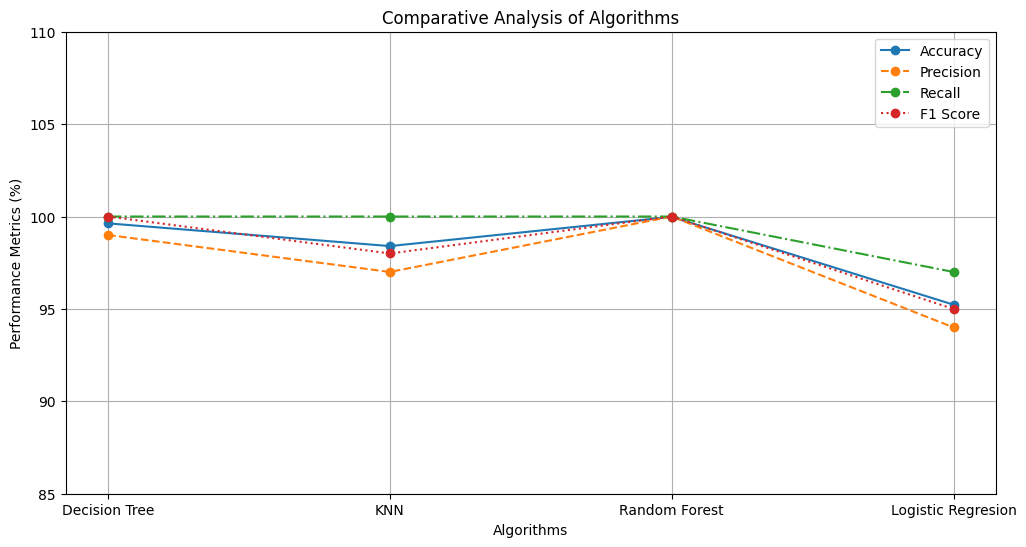

In [4]:
import matplotlib.pyplot as plt

algorithms = ['Decision Tree', 'KNN', 'Random Forest','Logistic Regresion']
accuracy = [99.63, 98.40, 99.98, 95.23]
precision = [99.0, 97.0, 100.0, 94.0]
recall = [100.0, 100.0, 100.0, 97.0]
f1_score = [100.0, 98.0, 100.0, 95.0]

plt.figure(figsize=(12, 6))

plt.plot(algorithms, accuracy, marker='o', label='Accuracy', linestyle='-')
plt.plot(algorithms, precision, marker='o', label='Precision', linestyle='--')
plt.plot(algorithms, recall, marker='o', label='Recall', linestyle='-.')
plt.plot(algorithms, f1_score, marker='o', label='F1 Score', linestyle=':')

plt.title('Comparative Analysis of Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Performance Metrics (%)')
plt.ylim(85, 110)
plt.grid(True)

plt.legend()

plt.show()


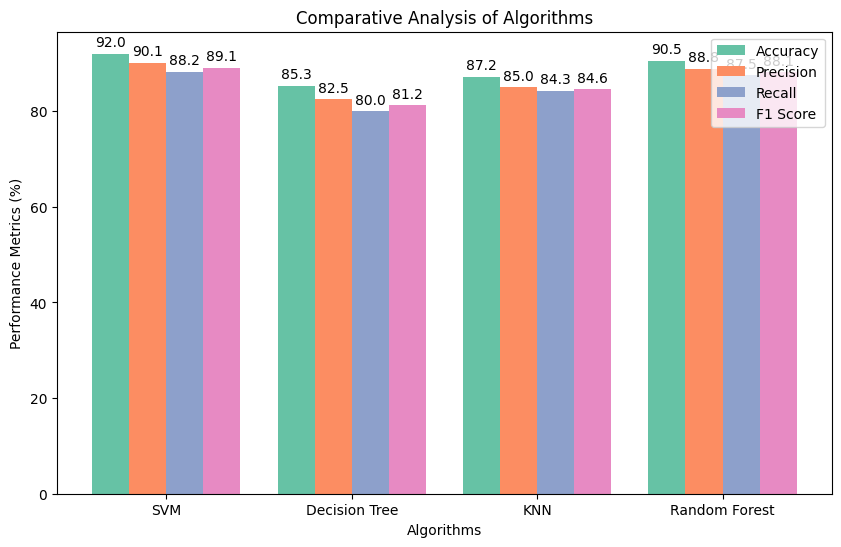

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the algorithms and their corresponding metrics
algorithms = ['SVM', 'Decision Tree', 'KNN', 'Random Forest']
accuracy = [92.0, 85.3, 87.2, 90.5]
precision = [90.1, 82.5, 85.0, 88.8]
recall = [88.2, 80.0, 84.3, 87.5]
f1_score = [89.1, 81.2, 84.6, 88.1]

# Create a numpy array for the positions of the bars on the x-axis
x = np.arange(len(algorithms))

# Define the width of the bars
width = 0.2

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Use lighter color palette
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

bar1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy', color=colors[0])
bar2 = ax.bar(x - width/2, precision, width, label='Precision', color=colors[1])
bar3 = ax.bar(x + width/2, recall, width, label='Recall', color=colors[2])
bar4 = ax.bar(x + width*1.5, f1_score, width, label='F1 Score', color=colors[3])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Algorithms')
ax.set_ylabel('Performance Metrics (%)')
ax.set_title('Comparative Analysis of Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# Display the plot
plt.show()
